Jason Secula
Homework 4.2
           
1) The Net Work Output is  = -782.6833477489292 kilojoule / kilogram
2) The Thermal Efficiency is  = 0.5992960243969171 dimensionless
           
Compression Ratio  = 2,Work Output  = 560603.6204334638 joule / kilogram
Compression Ratio  = 2,Thermal = 0.4956825280434922 dimensionless
           
Compression Ratio  = 10,Work Output  = 406985.39428961824 joule / kilogram
Compression Ratio  = 10,Thermal = 0.41641515534527473 dimensionless
           
Compression Ratio  = 18,Work Output  = 330613.58298897 joule / kilogram
Compression Ratio  = 18,Thermal = 0.366947599314966 dimensionless
           
Compression Ratio  = 26,Work Output  = 275933.61210721824 joule / kilogram
Compression Ratio  = 26,Thermal = 0.32604583972953616 dimensionless
           
Compression Ratio  = 34,Work Output  = 232336.00879205728 joule / kilogram
Compression Ratio  = 34,Thermal = 0.28944115040715634 dimensionless
           
Compression Ratio  = 42,Work Output  = 195639.7854

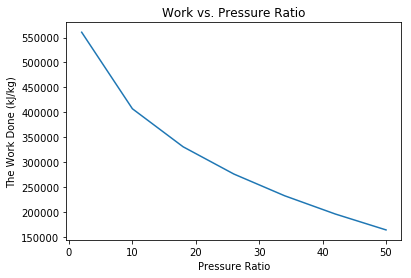

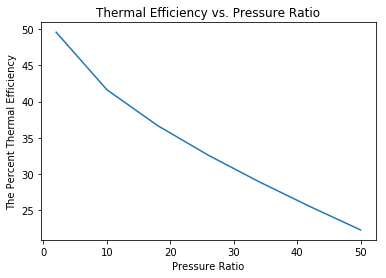

In [16]:
from thermostate import State, Q_, units
import matplotlib.pyplot as plt
import numpy as np
#http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
#http://matplotlib.org/users/pyplot_tutorial.html
from math import pi
#____________________________________________ Line 4 #
substance = 'air'
print('Jason Secula')
print('Homework 4.2')
print('           ')
#____________________________________________ Line 11 #
p_1 = Q_(1.0, 'bar')
T_1 = Q_(300.0, 'K')
st_1 = State(substance, T=T_1, p=p_1)
#_________1-2. Isentropic compression_________ Line 15 #
rp12 = Q_(8.0, 'dimensionless') #Pressure Ratio
p2 = (rp12*st_1.p)
st_2 = State(substance, s=st_1.s, p=p2)
#_________2-3. Isobaric Heat Addition_________ Line 19 #
T_3 = Q_(1700.0, 'K')
st_3 = State(substance, T=T_3 , p=p2 )
#_________3-4. Isentropic Expansion_________ Line 22 #
st_4 = State(substance,p=st_1.p, s=st_3.s ) 
#_________4-1. Isobaric Heat Rejection_________ Line 24 #

Wnet = ((st_4.u - st_3.u) - (st_2.u - st_1.u)).to('kJ/kg') #Wout-Win. 
print('1) The Net Work Output is  = {}'.format(Wnet)) #W_net in kJ/kg 
eta = (((st_1.h-st_1.h)+(st_3.h-st_4.h))/(st_3.h-st_2.h))
print('2) The Thermal Efficiency is  = {}'.format(eta))
print('           ')
#____________________________________________ Line 31 #
p_low = Q_(2.0, 'dimensionless')
p_high = Q_(50.0, 'dimensionless')#Had to make it readable as an integer for Python
for pl in range(1, 50, 8):
    rb = (pl+1)
    p2p = (rb*p_1)
    st_2p = State(substance, s=st_1.s, p=p2p)
    Wnet2 = ((st_3.u - st_4.u) - (st_2p.u - st_1.u)) #Wout-Win. 
    print('Compression Ratio  = {},'.format(rb)+'Work Output  = {}'.format(Wnet2)) #W_net in kJ/kg
    eta2 = (1-((st_4.u-st_1.u)/(st_3.u-st_2p.u)))
    print('Compression Ratio  = {},'.format(rb)+'Thermal = {}'.format(eta2)) #W_net in kJ/kg 
    print('           ')
plt.plot([2, 10, 18, 26, 34, 42, 50],[560604, 406985, 330614, 275934, 232336, 195640, 163719])
plt.title('Work vs. Pressure Ratio')
plt.ylabel('The Work Done (kJ/kg)')
plt.xlabel('Pressure Ratio')
plt.show()

plt.plot([2, 10, 18, 26, 34, 42, 50],[49.5682, 41.641, 36.694, 32.604, 28.944, 25.5401, 22.3022])
plt.title('Thermal Efficiency vs. Pressure Ratio')
plt.ylabel('The Percent Thermal Efficiency')
plt.xlabel('Pressure Ratio')
plt.show()